In [2]:
import requests
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt
import os
from utils import *

page = 1
# process_id = 'd61d665b-24c0-49e2-68cf-08dc4f239c87'
process_id = '41cbdc5f-c962-41bd-e792-08dc49b1ac23'
url = f"http://ocr.iguidevietnam.com/processes/{process_id}/items?status=done&page={page}&size=10"

response = requests.get(url)
response = response.json()
# print(response['totalItems'])
print(response)
annotation_data = []
if not os.path.exists('data'):
    os.mkdir('data')
if not os.path.exists('data/imgs'):
    os.mkdir('data/imgs')

for page in range (1, response['totalPages']+1):
# for page in range (1,2):
    url = f"http://ocr.iguidevietnam.com/processes/{process_id}/items?status=done&page={page}&size=10"
    response = requests.get(url)
    response = response.json()
    # print(response['totalItems'])
    for item in response['items']:
        img_response = requests.get(item['image'])
        nparr = np.fromstring(img_response.content, np.uint8)

        img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
        # img = Image.open(BytesIO(response.content))
        for box in item['result']['textboxes']:
            coordinates = [[c['x'], c['y']] for c in box["bndbox"]]
            if len(coordinates) != 4 or box['label'] == 'manufactured_country':
                continue
            h = np.sqrt((coordinates[0][0] - coordinates[1][0])**2 + (coordinates[0][1] - coordinates[1][1])**2)
            w = np.sqrt((coordinates[1][0] - coordinates[2][0])**2 + (coordinates[1][1] - coordinates[2][1])**2)
            homo, status = cv2.findHomography(np.array(coordinates), np.array([[0,0],[0,h],[w,h],[w,0]]))
            trans_img = cv2.warpPerspective(img, homo, (int(w),int(h)))
            file_name = add_to_end_of_filename(item['name'], box['label'])
            file_path = f'imgs/{file_name}'
            cv2.imwrite(f'data/{file_path}', trans_img)
            annotation_data.append(f"{file_path}\t{box['text']}\n")
            # visualize_opencv_image(trans_img)
            # print(box['text'])

import random
random.shuffle(annotation_data)
train_test_ratio = 0.7
index = round(len(annotation_data)*train_test_ratio)
print(index)

#write back the file
with open("data/train_annotation.txt","w") as f:
    f.writelines(annotation_data[:index])
with open("data/test_annotation.txt","w") as f:
    f.writelines(annotation_data[index:])

{'totalItems': 644, 'page': 1, 'totalPages': 65, 'items': [{'id': '80370949-8d71-44ec-3d1b-08dc49b1ac47', 'name': '[12A08711-07-00-28-12-2023]_HHCTdvxX0G9dJIUyhK9Pg_23009394_1_.jpg', 'type': 'gplx', 'status': 'done', 'process': '41cbdc5f-c962-41bd-e792-08dc49b1ac23', 'image': 'http://ocr.iguidevietnam.com/files/20240321/dc855b15-f562-40f0-b700-8362772dbb5d.jpg', 'itemHistories': [], 'result': {'doctype': ['driving_license_front'], 'width': 1672, 'height': 1216, 'textboxes': [{'id': 0, 'bndbox': [{'x': 592, 'y': 653}, {'x': 590, 'y': 702}, {'x': 1500, 'y': 719}, {'x': 1503, 'y': 670}], 'confidence': 1, 'text': 'P. Đông Kinh, TP. Lạng Sơn, T. Lạng Sơn ', 'label': 'address'}, {'id': 1, 'bndbox': [{'x': 369, 'y': 825}, {'x': 367, 'y': 898}, {'x': 525, 'y': 901}, {'x': 528, 'y': 828}], 'confidence': 1, 'text': 'A1, B2 ', 'label': 'class'}, {'id': 2, 'bndbox': [{'x': 1097, 'y': 486}, {'x': 1094, 'y': 555}, {'x': 1335, 'y': 559}, {'x': 1338, 'y': 490}], 'confidence': 1, 'text': '10/10/1976 ',

/tmp/ipykernel_66092/37175903.py:32: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  nparr = np.fromstring(img_response.content, np.uint8)


3769


/tmp/ipykernel_321162/3099605166.py:21: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  nparr = np.fromstring(img_response.content, np.uint8)


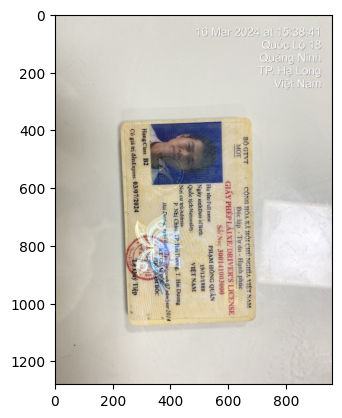

{'height': 761, 'width': 1210, 'homo': 'aaJJk310wT845xPQJdYAQKzyIgqWE4fAh1j/4kwSAMAbTLWiuSCnP9FyIwh1RJJAXhtfp97AIz/5rPCzbywDvwAAAAAAAPA/', 'width_ratio': 1.1552346570397112, 'height_ratio': 1.1552346570397112}
[[ 1.36367509e-01  2.10456431e+00 -7.38448262e+02]
 [-2.00893571e+00  4.51715480e-02  1.16911429e+03]
 [ 1.50706462e-04 -3.65707006e-05  1.00000000e+00]]


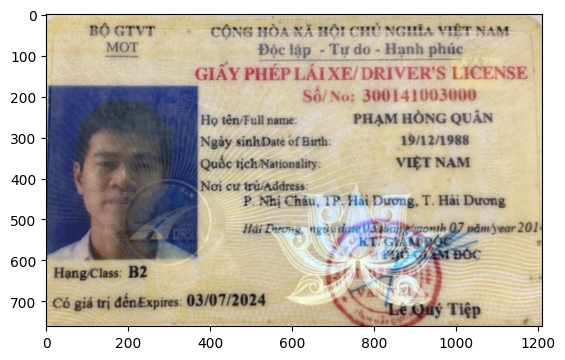

In [ ]:
import requests
import requests
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt
import base64

# image_url = "http://ocr.iguidevietnam.com/files/20240321/3a08e810-52f0-49f2-a3ee-f0ca4d14b220.jpg"
image_url = "http://ocr.iguidevietnam.com/files/20240321/40100d90-c0aa-448d-ae14-272c6b20f728.jpg"

def visualize_opencv_image(img):
    import cv2
    import matplotlib.pyplot as plt

    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.show()

img_response = requests.get(image_url)
nparr = np.fromstring(img_response.content, np.uint8)
img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
visualize_opencv_image(img)

# Get homograpy matrix
files = {"img": img_response.content}
host = "http://118.107.77.131:8008"
# host = "http://localhost:8000"
response = requests.post(f"{host}/get_homography?type=gplx", files=files, timeout=200)
first_homo = response.json()[0]
print(first_homo)
W = first_homo['width']
H = first_homo['height']
homo_str = first_homo['homo']
img_bytes = base64.b64decode(homo_str)
homo = np.frombuffer(img_bytes, np.float64).reshape((3,3))
print(homo)
resized_img = cv2.resize(img, (int(img.shape[1]/first_homo['width_ratio']), int(img.shape[0]/first_homo['height_ratio'])))
new_img = cv2.warpPerspective(resized_img, homo, (W,H))
visualize_opencv_image(new_img)

In [ ]:
!git clone https://github.com/hungpham13/ocr-training
%cd ocr-training
!pip install -q -r requirements.txt
from google.colab import drive
drive.mount('/content/drive')
!unzip /content/drive/MyDrive/gplx-data.zip

# Train model



1.   Load your config
2.   Train model using your dataset above



Load the default config, we adopt VGG for image feature extraction

In [1]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

# Change the config

* *data_root*: the folder save your all images
* *train_annotation*: path to train annotation
* *valid_annotation*: path to valid annotation
* *print_every*: show train loss at every n steps
* *valid_every*: show validation loss at every n steps
* *iters*: number of iteration to train your model
* *export*: export weights to folder that you can use for inference
* *metrics*: number of sample in validation annotation you use for computing full_sequence_accuracy, for large dataset it will take too long, then you can reuduce this number


In [2]:
config = Cfg.load_config_from_name('vgg_transformer')

In [7]:

dataset_params = {
    'name':'gplx',
    'data_root':'./data/',
    'train_annotation':'train_annotation.txt',
    'valid_annotation':'test_annotation.txt'
}

params = {
         'print_every':200,
         'valid_every':15*200,
          'iters':20000,
          'checkpoint':'./checkpoint/transformerocr_checkpoint.pth',
          'export':'./weights/transformerocr.pth',
          'metrics': 10000
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['aug']['image_aug']= False
# config['device'] = 'cuda:0'
config['device'] = 'cpu'

you can change any of these params in this full list below

In [5]:
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ',
 'device': 'cuda:0',
 'seq_modeling': 'transformer',
 'transformer': {'d_model': 256,
  'nhead': 8,
  'num_encoder_layers': 6,
  'num_decoder_layers': 6,
  'dim_feedforward': 2048,
  'max_seq_length': 1024,
  'pos_dropout': 0.1,
  'trans_dropout': 0.1},
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'trainer': {'batch_size': 32,
  'print_every': 200,
  'valid_every': 3000,
  'iters': 20000,
  'export': './weights/transformerocr.pth',
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'log': './train.log',
  'metrics': 10000},
 'dataset': {'name': 'gplx',
  'data_root': './data/',
  'train_annotation': 'train_annotation.txt',
  'valid_annotation': 'test_annotation.txt',
  'image_height': 32,
  'image_min_width': 32,
  'image_ma

You should train model from our pretrained

In [8]:
trainer = Trainer(config, pretrained=True)

18533it [01:20, 230.34it/s] 
Create train_gplx: 100%|██████████████████████████████████████| 3769/3769 [00:00<00:00, 4285.63it/s]

Created dataset with 3768 samples



Create valid_gplx: 100%|██████████████████████████████████████| 1616/1616 [00:00<00:00, 4026.53it/s]


Created dataset with 1615 samples


valid_gplx build cluster: 100%|█████████████████████████████| 1615/1615 [00:00<00:00, 283707.53it/s]


Save model configuration for inference, load_config_from_file

In [9]:
trainer.config.save('config.yml')

Visualize your dataset to check data augmentation is appropriate

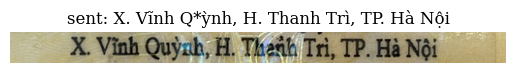

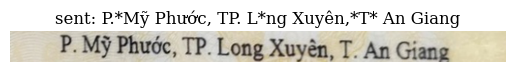

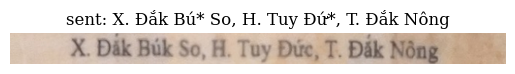

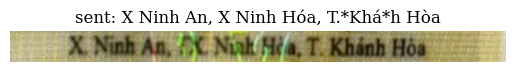

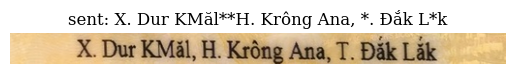

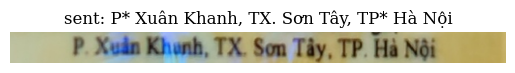

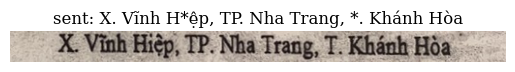

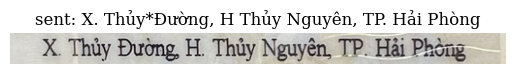

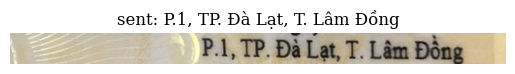

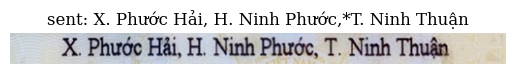

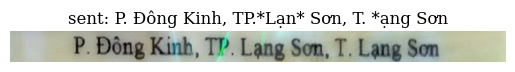

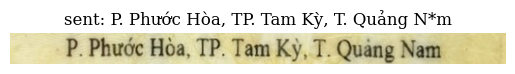

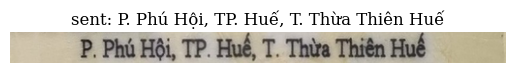

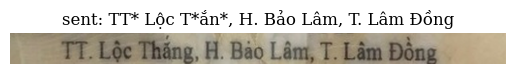

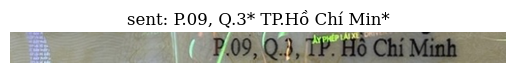

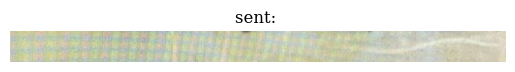

In [10]:
trainer.visualize_dataset()

Train now

In [15]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:5109: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


iter: 000200 - train loss: 0.877 - lr: 1.91e-05 - load time: 1.56 - gpu time: 58.99
iter: 000400 - train loss: 0.749 - lr: 3.95e-05 - load time: 0.93 - gpu time: 61.50
iter: 000600 - train loss: 0.706 - lr: 7.14e-05 - load time: 0.90 - gpu time: 58.82
iter: 000800 - train loss: 0.711 - lr: 1.12e-04 - load time: 1.20 - gpu time: 59.80
iter: 001000 - train loss: 0.704 - lr: 1.56e-04 - load time: 0.74 - gpu time: 60.22
iter: 001200 - train loss: 0.691 - lr: 2.01e-04 - load time: 0.97 - gpu time: 58.78
iter: 001400 - train loss: 0.710 - lr: 2.41e-04 - load time: 1.14 - gpu time: 59.28
iter: 001600 - train loss: 0.701 - lr: 2.73e-04 - load time: 0.91 - gpu time: 61.11
iter: 001800 - train loss: 0.707 - lr: 2.93e-04 - load time: 0.90 - gpu time: 61.41
iter: 002000 - train loss: 0.700 - lr: 3.00e-04 - load time: 0.96 - gpu time: 57.85
iter: 002200 - train loss: 0.708 - lr: 3.00e-04 - load time: 1.07 - gpu time: 60.12
iter: 002400 - train loss: 0.712 - lr: 3.00e-04 - load time: 1.16 - gpu time

Visualize prediction from our trained model


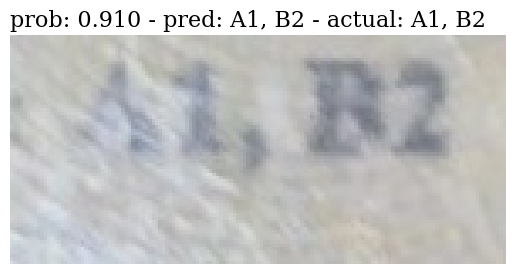

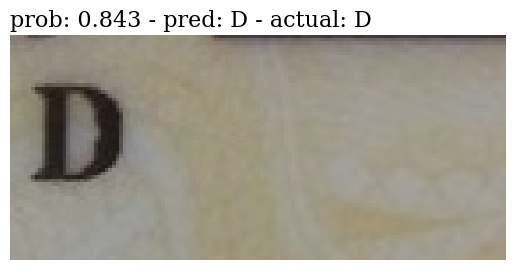

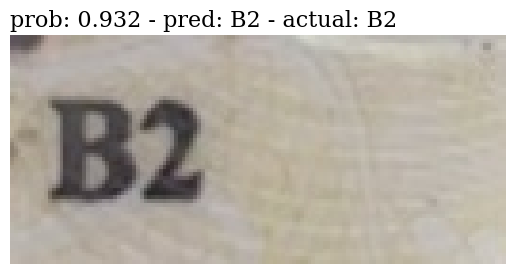

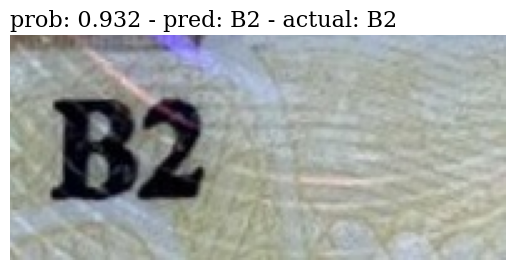

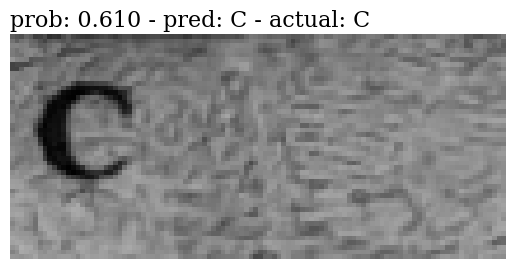

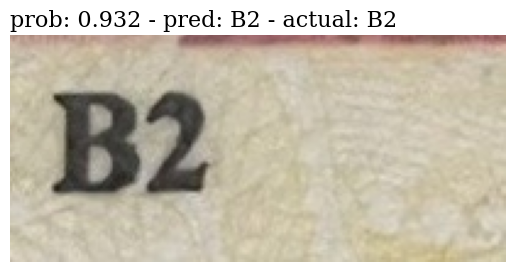

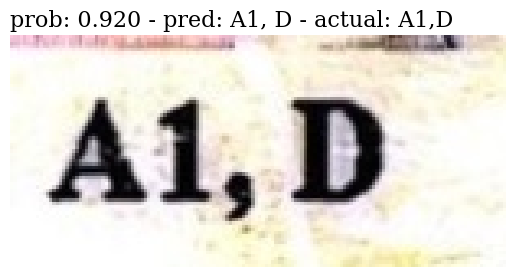

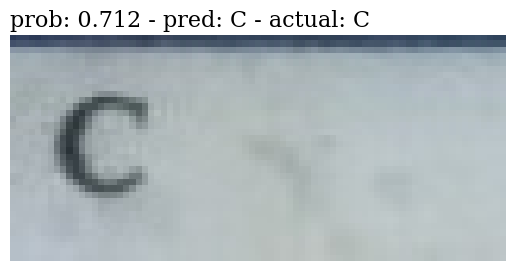

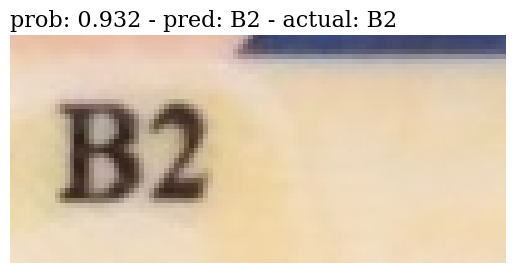

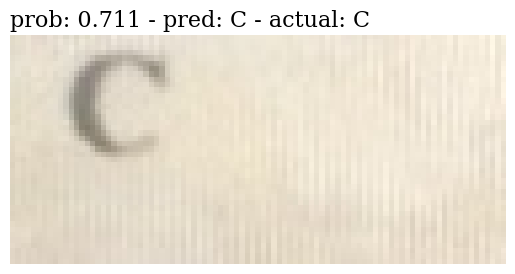

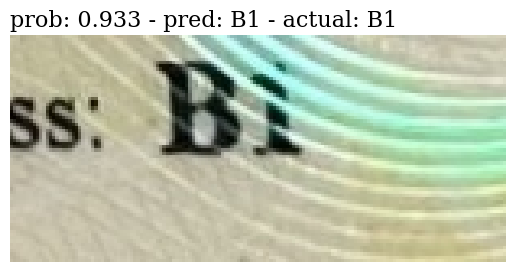

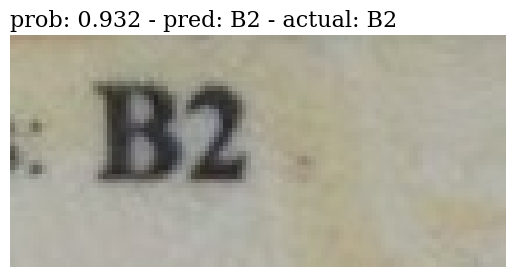

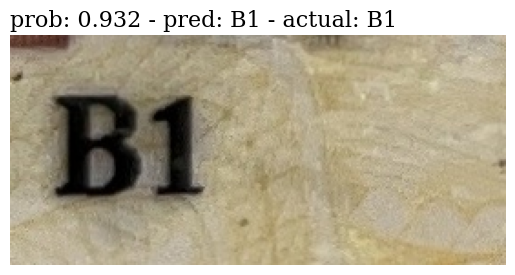

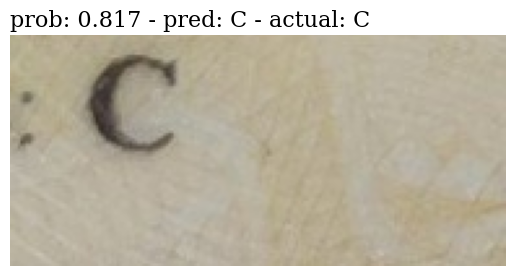

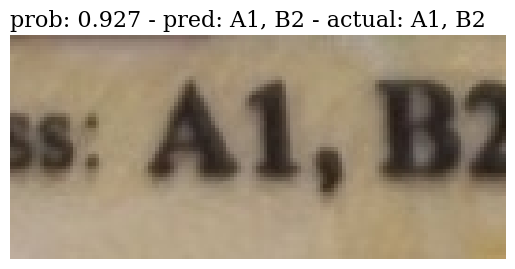

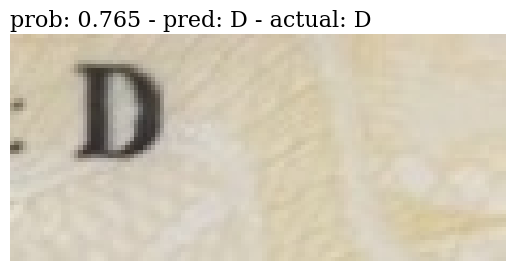

In [16]:
trainer.visualize_prediction()

Compute full seq accuracy for full valid dataset

In [19]:
trainer.precision()

(0.8125, 0.91034126)